# Building and Training a CNN for Digit Recognition Using TensorFlow

Project Structure
- Setup the Environment

- Create a new notebook in Jupyter Lab.
- Import necessary libraries.
- Load and Preprocess Data
- Define the Model
- Compile the Model
- Train the Model
- Evaluate the Model
- Save the Model
- Use the model for actual recognition

In [17]:
# 1. Import Necessary Libraries  
import tensorflow as tf  
import matplotlib.pyplot as plt
from PIL import Image as im
import numpy as np

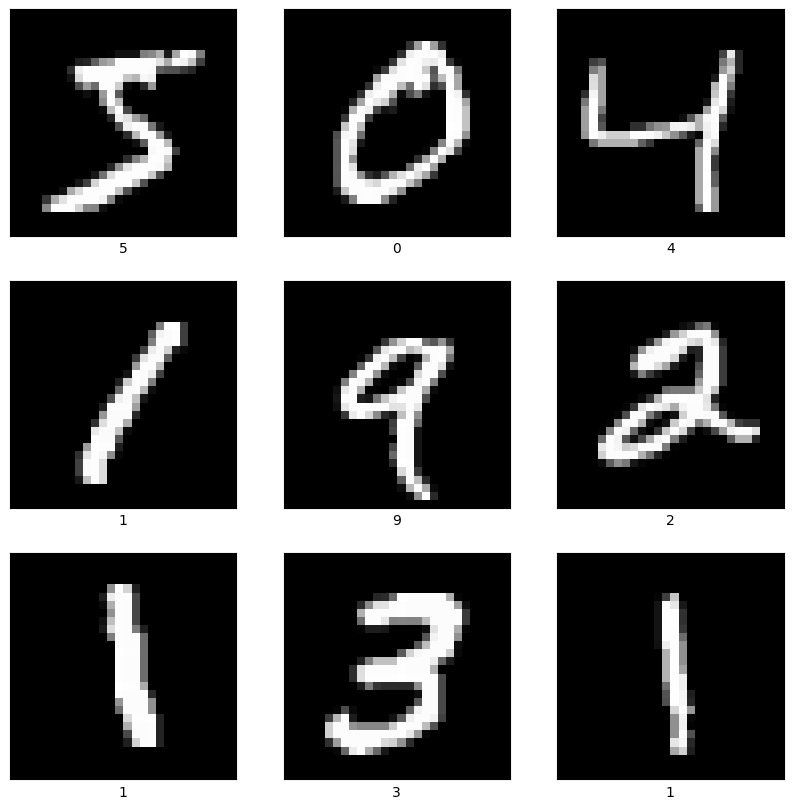

In [5]:
# 2. Load and Preprocess the MNIST Dataset  
# Load the digits dataset  
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  

# Normalize the data by dividing it by 255  
x_train, x_test = x_train / 255.0, x_test / 255.0  

# Reshape data to have a single channel  
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

# Visualize some samples from the dataset  
plt.figure(figsize=(10, 10))  
for i in range(9):  
    plt.subplot(3, 3, i + 1)  
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  
    plt.xlabel(y_train[i])  
plt.show()  

In [8]:
# 3. Define the CNN Model  
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(10)  # 10 classes for digits 0-9  
])

In [9]:
# 4. Compile the Model  
model.compile(optimizer='adam',  
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
              metrics=['accuracy'])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8774 - loss: 0.3846 - val_accuracy: 0.9845 - val_loss: 0.0540
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9847 - val_loss: 0.0482
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9874 - loss: 0.0386 - val_accuracy: 0.9892 - val_loss: 0.0368
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9885 - val_loss: 0.0400
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9926 - loss: 0.0212 - val_accuracy: 0.9885 - val_loss: 0.0429
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9940 - loss: 0.0175 - val_accuracy: 0.9887 - val_loss: 0.0441
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9944 - loss: 0.0150 - val_accuracy: 0.9900 - val_loss: 0.0414
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9954 -

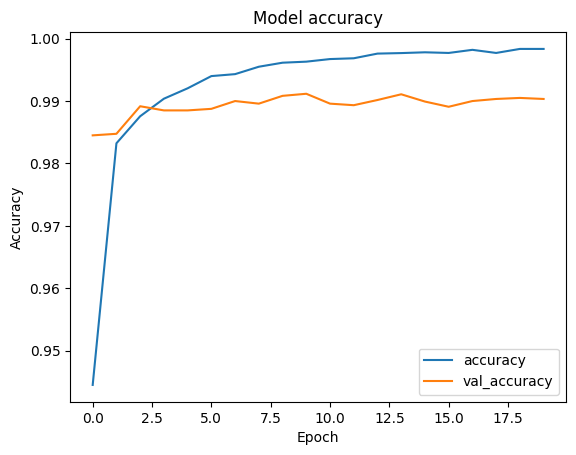

In [10]:
# 5. Train the Model  
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)  

# Visualize the training process  
plt.plot(history.history['accuracy'], label='accuracy')  
plt.plot(history.history['val_accuracy'], label='val_accuracy')  
plt.title('Model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend()  
plt.show()

In [11]:
# 6. Evaluate the Model  
test_loss, test_acc = model.evaluate(x_test, y_test)  
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0457
Test accuracy: 0.9925000071525574


In [12]:
# 7. Save the Model  
model.save("digit_recog_cnn_model.keras")  
print("Model saved successfully!")

Model saved successfully!


In [15]:
# Importing the model created
model = tf.keras.models.load_model("digit recognition/digit_recog_cnn_model.keras")

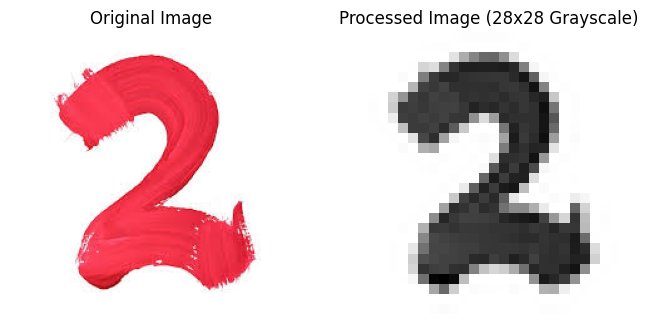

In [19]:
# Preprocessing a sample image to convert it into a grayscale and resize it  

# Load and display the original image  
image_path = "digit recognition/sample images/sample_image2.jpeg"  
img = im.open(image_path)  

# Plot the original image  
plt.figure(figsize=(8, 4))  
plt.subplot(1, 2, 1)  
plt.imshow(img)  
plt.title('Original Image')  
plt.axis('off')  # Hide axes  

# Preprocessing the image: Convert to grayscale and resize  
img_gray = img.convert('L')  # Convert image to grayscale  
img_resized = img_gray.resize((28, 28), im.LANCZOS)  # Resize to 28x28  
image_array = np.array(img_resized).reshape(1, 28, 28, 1) / 255.0  # Reshape and normalize  

# Plot the processed image  
plt.subplot(1, 2, 2)  
plt.imshow(img_resized, cmap='gray')  # Display the grayscale image  
plt.title('Processed Image (28x28 Grayscale)')  
plt.axis('off')  # Hide axes  

# Show both images  
plt.show()  

In [23]:
# Predicting the digit using model
digit = model(image_array)  
print("The predicted digit is:", np.argmax(digit))

The predicted digit is: 2


In [ ]:
# we can see the recognition of the digit is correct

## Conclusion  

In conclusion, our **digit recognition project** has successfully demonstrated the power and effectiveness of **convolutional neural networks (CNNs)** in image classification tasks.   

- Through the rigorous preprocessing of images and the implementation of a well-structured model, we have achieved remarkable accuracy in identifying handwritten digits.   
- This project not only highlights the potential of deep learning techniques in the field of computer vision, but it also serves as a stepping stone for further exploration into more complex image recognition challenges.   
- As we refine our model and experiment with advanced techniques, we can envision applications in various domains, from automated data entry to intelligent tutoring systems.   

The journey of digit recognition exemplifies how technology can bridge the gap between human intuition and machine learning capabilities, opening avenues for innovation and efficiency in our digital world.